<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON611
### Final Exam - Take Home Project



---
#### Guidelines 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **20%** of your final exam score.
- You need to be part of a group with **3** students.
- The **take home project** is due on **DEC 9th 2019** before class/exam (if you are taking the in-class exam before the rest of the class, you **need to push your take home project** before you commence with the in-class exam) = **NO EXCUSES !!**
- The team leader will receive an email where he/she will uploading the team members names and a link to the notebook in GitHub.

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
import re
import datetime as dt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [2]:
iowa_path = '../../../database/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_path)
iowa.columns

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [3]:
iowa.shape

(270955, 18)

In [4]:
iowa.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [5]:
iowa2 = iowa.copy()

In [331]:
#iowa1['Date'] = pd.to_datetime(iowa1['Date'])
#dates = iowa1['Date']
#iowa1['Month'] = dates.dt.month
#iowa1['Year'] = dates.dt.year

In [913]:
iowa1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,31.0,62.00,77.00,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,1012200.0,1031200.00,1062310.00,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54
Month,269258.0,5.837892e+00,3.621794,1.00,3.0,5.00,9.00,12.00



## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [6]:
iowa3 = iowa.copy()
iowa3.dtypes
#cost, retail and sale dollars need to be number instead of object

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

### 3.2 Clean the columns

In [7]:
print(iowa3.isnull().sum())
print(len(iowa3))

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64
270955


In [9]:
iowa3 = iowa3.loc[iowa3['County Number'].notnull() & iowa3['County'].notnull() & iowa3['Category'].notnull() & iowa3['Category Name'].notnull()]

print(iowa3.isnull().sum())
print('\n')
print(iowa3.shape)


Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64


(269258, 18)



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [10]:
obj2int = ['Store Number','County Number', 'Category']
obj2float = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']
for i in obj2float:
    iowa3[i] = iowa3[i].astype(str).str.replace('$', '').astype(float)
for j in obj2int:
    iowa3[j] = iowa3[j].astype('int64')
    
iowa3[obj2int+obj2float].head()
print(iowa3.dtypes)

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number              int64
County                    object
Category                   int64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object


In [145]:
df=iowa.loc[iowa['County Number'].isna()]
df[['City','County']].head()

,City,County
135,CEDAR RAPIDS,nan
198,SIOUX CITY,nan
272,EVANSDALE,nan
290,ANAMOSA,nan
321,WAVERLY,nan



## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [11]:
iowa4 = iowa3.copy()
#Month = iowa4['Date'].str.partition('/')[0].astype(int)   # add month column to the data
#Year = iowa4['Date'].str[-4:].astype(int)                 # add year column to the data
#iowa4['Month'] = Month
#iowa4['Year'] = Year
#iowa4.head()

iowa4['Date'] = pd.to_datetime(iowa4['Date'])
iowa4['Month'] = iowa4['Date'].dt.month
iowa4['Year'] = iowa4['Date'].dt.year

iowa4.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2,2016
3,2016-02-03,2501,AMES,50010,85,Story,1071100,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2,2016
4,2015-08-18,3654,BELMOND,50421,99,Wright,1031080,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,8,2015


In [30]:
dy1 = iowa4[['Store Number','Month']].loc[(iowa4['Year'] == 2015)]
dy2 = dy1.groupby(['Store Number', 'Month']).count().reset_index()
dy3 = dy2.groupby(['Store Number']).count().reset_index()
dy4 = dy3[dy3['Month']==12]
#fy_shop_list = [i[0] for i in dy4.values.tolist()]
print(dy4.tail())
Stores_list = iowa4.loc[(iowa4['Year'] == 2015) &(iowa4['Store Number'].isin(dy4['Store Number']))]
Stores_list.tail()




      Store Number  Month
1253          5086     12
1256          5089     12
1259          5092     12
1260          5093     12
1368          9002     12


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year
270948,2015-04-08,2545,IOWA CITY,52245,52,Johnson,1062300,FLAVORED RUM,35,43145,Bacardi Pineapple Fusion,750,8.50,12.75,3,38.25,2.25,0.59,4,2015
270949,2015-07-21,2529,CEDAR RAPIDS,52405,57,Linn,1031100,100 PROOF VODKA,300,36887,McCormick Vodka,1000,4.13,6.20,3,18.60,3.00,0.79,7,2015
270950,2015-12-22,4057,DES MOINES,50316,77,Polk,1022100,TEQUILA,410,88291,Patron Tequila Silver Mini,300,20.30,30.45,4,121.80,1.20,0.32,12,2015
270953,2015-11-20,3562,WEST BURLINGTON,52655,29,Des Moines,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,26.05,39.08,6,234.48,10.50,2.77,11,2015
270954,2015-01-27,4446,URBANDALE,50322,77,Polk,1031080,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,2.75,4.13,8,33.04,1.60,0.42,1,2015



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [31]:
iowa5 = Stores_list.copy()
iowa5[['Store Number','Sale (Dollars)']].groupby('Store Number').sum().head(7)

,Sale (Dollars)
Store Number,
2106,146038.70
2113,9310.22
2130,111583.91
2152,7721.08
2178,24324.18
2190,121689.06
2191,125093.49


### 5.2 Calculate the profit each store is making in 2015.


In [32]:
iowa5['Profit'] = iowa5['Sale (Dollars)'] - iowa5['State Bottle Cost']*iowa5['Bottles Sold']
iowa5[['Store Number','Profit']].groupby('Store Number').sum().sort_values(by='Profit', ascending = False).head(10)

,Profit
Store Number,
2633,332863.87
4829,291813.75
3385,147084.62
2512,140072.72
3420,116532.24
3952,110750.81
3814,83004.48
3354,80173.95
3773,77393.83


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [33]:
iowa5_sub1 = iowa5[['County','Profit','Volume Sold (Gallons)']].groupby('County').sum().sort_values(by='Volume Sold (Gallons)', ascending=False)
print(iowa5_sub1.head())
iowa5_sub1['Profit per Gallon']= iowa5_sub1['Profit'] / iowa5_sub1['Volume Sold (Gallons)']
iowa5_sub1.sort_values(by='Profit per Gallon', ascending=False).head()
#Dallas is the county making most profit per gallon in 2015




                Profit  Volume Sold (Gallons)
County                                       
Polk        1897546.11               96200.22
Linn         744709.32               41547.33
Scott        662922.08               34169.07
Black Hawk   499810.35               27260.78
Johnson      531104.32               26056.45


,Profit,Volume Sold (Gallons),Profit per Gallon
County,,,
Dallas,156792.40,7267.75,21.573720
Johnson,531104.32,26056.45,20.382835
Polk,1897546.11,96200.22,19.724966
Jefferson,25381.56,1296.66,19.574569
Scott,662922.08,34169.07,19.401233


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [34]:
iowa5_sub2 = iowa5[['Store Number','Profit','Volume Sold (Gallons)']].groupby('Store Number').sum().reset_index()

iowa5_sub2['Profit per Gallon']= iowa5_sub2['Profit'] / iowa5_sub2['Volume Sold (Gallons)']

iowa5_sub2.sort_values(by='Profit per Gallon', ascending = False)[:10]
#print(iowa5_sub2.sort_values(by='Volume Sold (Gallons)', ascending=False)

#Is the profit to store size ratio increasing as store size increases? no trend indicating so
# Decreasing?  there's a general trend that profit/size ratio decrease when store size increases but there're still many exceptions and outliers.
# Consistent? 

,Store Number,Profit,Volume Sold (Gallons),Profit per Gallon
665,4669,3143.12,36.39,86.373179
828,9002,12574.08,328.17,38.315751
798,5009,1352.29,42.01,32.189717
785,4979,10631.11,333.73,31.855422
656,4648,16140.07,524.31,30.783449
11,2248,22584.51,743.70,30.367769
186,3521,13636.49,453.87,30.044925
236,3698,4520.79,152.23,29.697103
277,3805,12795.59,445.74,28.706398
649,4638,11915.13,417.02,28.572083


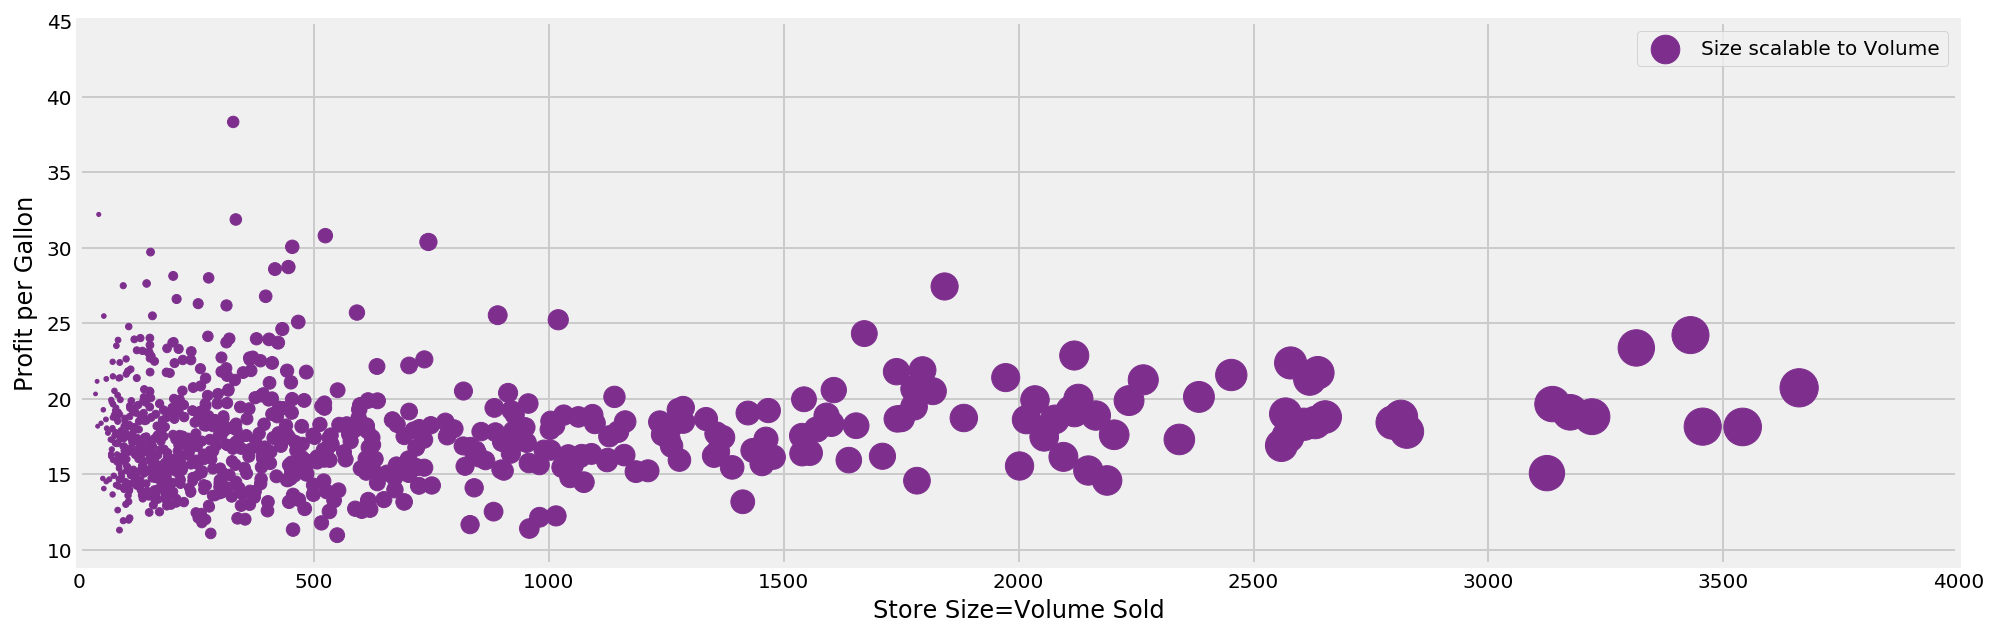

In [35]:
plt.figure(figsize=(15, 5))
plt.scatter(iowa5_sub2['Volume Sold (Gallons)'],iowa5_sub2['Profit per Gallon'], color=[0.4940, 0.1840, 0.5560],s=iowa5_sub2['Volume Sold (Gallons)'].values/10)
plt.axis([0,4000,9,45])
plt.xlabel('Store Size=Volume Sold')
plt.ylabel('Profit per Gallon')
plt.legend(['Size scalable to Volume'],markerscale=0.5)
plt.show()
#Is the profit to store size ratio increasing as store size increases? no trend indicating so
# Decreasing?  there's a general trend that profit/size ratio decrease when store size increases 
# but there're still many exceptions and outliers.
# Consistent? Though there're outliers, in general we can still conclude that the profit/store ratio is deminishing 
# when store size increases and stablize at around $15-$20 range when the store size is bigger than 1500G

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [36]:
iowa5_5=iowa5['Category Name'].unique()
Cat2={}
for x in iowa5_5:
    if x.find('WHISKIES')!=-1:
        Cat2[x] = 'Whisky'
    elif x.find('VODKA')!=-1:
        Cat2[x] = 'Vodka'
    elif x.find('GINS')!=-1:
        Cat2[x] = 'Gin'
    elif x.find('TEQUILA')!=-1:
        Cat2[x] = 'Tequila'
    elif x.find('BRANDIES')!=-1:
        Cat2[x] = 'Brandy'
    elif x.find('SCHNAPPS')!=-1:
        Cat2[x] = 'Schnapps'
    elif x.find('RUM')!=-1:
        Cat2[x] = 'Rum'
    elif x.find('COCKTAILS')!=-1:
        Cat2[x] = 'Cocktails'
    else:
        Cat2[x] = 'Misc'
print(Cat2)
iowa5['Liquor'] = iowa5['Category Name'].map(Cat2)
list(iowa5['Liquor'].unique())

#iowa5_5['Cat2'] = ['WHISKY' if x.find('WHISKIES') != -1 else 'MISC' for x in iowa5_5['Category Name'] ] 
#iowa5['Category Name'].unique()

{'APRICOT BRANDIES': 'Brandy', 'VODKA 80 PROOF': 'Vodka', 'AMERICAN DRY GINS': 'Gin', 'AMERICAN GRAPE BRANDIES': 'Brandy', 'CANADIAN WHISKIES': 'Whisky', 'CINNAMON SCHNAPPS': 'Schnapps', 'SINGLE BARREL BOURBON WHISKIES': 'Whisky', 'AMERICAN COCKTAILS': 'Cocktails', 'VODKA FLAVORED': 'Vodka', 'DISTILLED SPIRITS SPECIALTY': 'Misc', 'BLENDED WHISKIES': 'Whisky', 'TEQUILA': 'Tequila', 'TENNESSEE WHISKIES': 'Whisky', 'WHISKEY LIQUEUR': 'Misc', 'MISC. AMERICAN CORDIALS & LIQUEURS': 'Misc', 'APPLE SCHNAPPS': 'Schnapps', 'CHERRY BRANDIES': 'Brandy', 'MISC. IMPORTED CORDIALS & LIQUEURS': 'Misc', 'WATERMELON SCHNAPPS': 'Schnapps', 'BLACKBERRY BRANDIES': 'Brandy', 'SINGLE MALT SCOTCH': 'Misc', 'SPICED RUM': 'Rum', 'IMPORTED VODKA': 'Vodka', 'CREAM LIQUEURS': 'Misc', 'SCOTCH WHISKIES': 'Whisky', '100 PROOF VODKA': 'Vodka', 'STRAIGHT BOURBON WHISKIES': 'Whisky', 'IMPORTED VODKA - MISC': 'Vodka', 'IRISH WHISKIES': 'Whisky', 'IMPORTED DRY GINS': 'Gin', 'SPEARMINT SCHNAPPS': 'Schnapps', 'FLAVORED RUM'

['Brandy',
 'Vodka',
 'Gin',
 'Whisky',
 'Schnapps',
 'Cocktails',
 'Misc',
 'Tequila',
 'Rum']

In [37]:
iowa5['Category Name'].unique()

array(['APRICOT BRANDIES', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA FLAVORED',
       'DISTILLED SPIRITS SPECIALTY', 'BLENDED WHISKIES', 'TEQUILA',
       'TENNESSEE WHISKIES', 'WHISKEY LIQUEUR',
       'MISC. AMERICAN CORDIALS & LIQUEURS', 'APPLE SCHNAPPS',
       'CHERRY BRANDIES', 'MISC. IMPORTED CORDIALS & LIQUEURS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'SPICED RUM', 'IMPORTED VODKA', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', '100 PROOF VODKA', 'STRAIGHT BOURBON WHISKIES',
       'IMPORTED VODKA - MISC', 'IRISH WHISKIES', 'IMPORTED DRY GINS',
       'SPEARMINT SCHNAPPS', 'FLAVORED RUM',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'TRIPLE SEC',
       'AMERICAN AMARETTO', 'IMPORTED SCHNAPPS',
       'MISCELLANEOUS  BRANDIES', 'STRAWBERRY SCHNAPPS', 'JAMAICA RUM',
       'BARBADOS RUM', 'IM

### 5.6 Do relationships exist between the broader liquor type and profit?

In [38]:
iowa5.head()
iowa5_6 = iowa5[['Liquor','Profit','Volume Sold (Gallons)']].groupby(['Liquor']).sum().reset_index()
iowa5_6['Profit per Gallon'] = iowa5_6['Profit'] / iowa5_6['Volume Sold (Gallons)']
iowa5_6 = iowa5_6.sort_values(by='Profit per Gallon', ascending = False)
iowa5_6


,Liquor,Profit,Volume Sold (Gallons),Profit per Gallon
6,Tequila,484912.28,19152.25,25.318815
0,Brandy,341049.53,14222.72,23.979206
3,Misc,1310441.76,55064.99,23.798093
8,Whisky,2622013.39,129361.34,20.268910
4,Rum,1155231.98,65969.95,17.511488
2,Gin,235502.39,13912.48,16.927420
5,Schnapps,310613.93,18927.36,16.410843
7,Vodka,2061401.62,143443.94,14.370782
1,Cocktails,145463.11,16525.84,8.802161


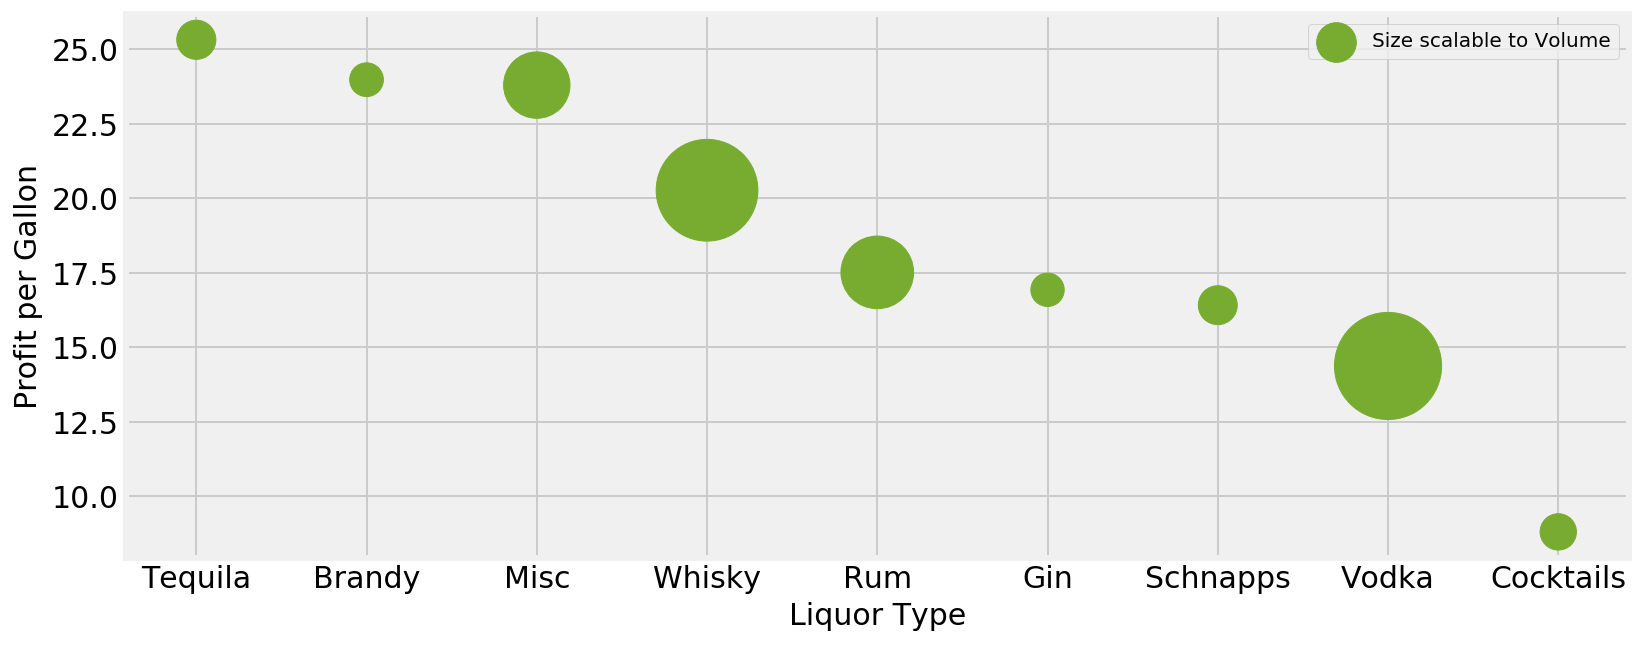

,Liquor,Profit,Volume Sold (Gallons),Profit per Gallon
6,Tequila,484912.28,19152.25,25.318815
0,Brandy,341049.53,14222.72,23.979206
3,Misc,1310441.76,55064.99,23.798093
8,Whisky,2622013.39,129361.34,20.268910
4,Rum,1155231.98,65969.95,17.511488
2,Gin,235502.39,13912.48,16.927420
5,Schnapps,310613.93,18927.36,16.410843
7,Vodka,2061401.62,143443.94,14.370782
1,Cocktails,145463.11,16525.84,8.802161


In [39]:
plt.figure(figsize=(12, 5))
plt.scatter(iowa5_6['Liquor'], iowa5_6['Profit per Gallon'],color=[0.4660, 0.6740, 0.1880],s=iowa5_6['Volume Sold (Gallons)'].values/50)
plt.xlabel("Liquor Type", fontsize=15)
plt.ylabel("Profit per Gallon", fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(['Size scalable to Volume'],markerscale=0.5)
plt.show()
# certain types of liquor do have stronger profitability such as Tequila, Brandies and Whisky
# but their volume size, or scalability, is not the same: Whisky has $20/gallon profitablility but 
# it comes with a size of 140k Gallons in 2015. Meanwhile, Tequila is very profitable but it's scalability is lower
# only 20k gallons
iowa5_6


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [40]:
iowa5_7 = iowa5[['Liquor','Item Description','Sale (Dollars)','Profit','Volume Sold (Gallons)']].groupby(['Liquor','Item Description']).sum().reset_index()
iowa5_7['Profit per Gallon'] = iowa5_7['Profit'] / iowa5_7['Volume Sold (Gallons)']
iowa5_7[(iowa5_7['Liquor']!='Misc')].sort_values(by=['Volume Sold (Gallons)','Profit per Gallon'], ascending = False).head(10)


,Liquor,Item Description,Sale (Dollars),Profit,Volume Sold (Gallons),Profit per Gallon
1568,Whisky,Black Velvet,1098265.66,376012.32,31808.18,11.821246
1244,Vodka,Hawkeye Vodka,497327.49,165931.08,20741.29,8.000037
836,Rum,Captain Morgan Spiced Rum,885144.12,295158.62,13718.27,21.515732
1160,Vodka,Barton Vodka,266352.78,88874.90,11767.82,7.552367
1222,Vodka,Five O'clock Vodka,261413.46,87245.73,10634.53,8.204004
1736,Whisky,Jack Daniels Old #7 Black Lbl,900620.59,300262.39,8672.56,34.622117
1321,Vodka,Phillips Vodka,187943.32,62691.01,7603.81,8.244684
784,Rum,Bacardi Superior Rum,350793.27,117504.59,6648.59,17.673610
1153,Vodka,Absolut Swedish Vodka 80 Prf,505605.89,168617.50,6266.97,26.905746
1894,Whisky,Seagrams 7 Crown Bl Whiskey,252680.88,84227.78,5895.25,14.287397


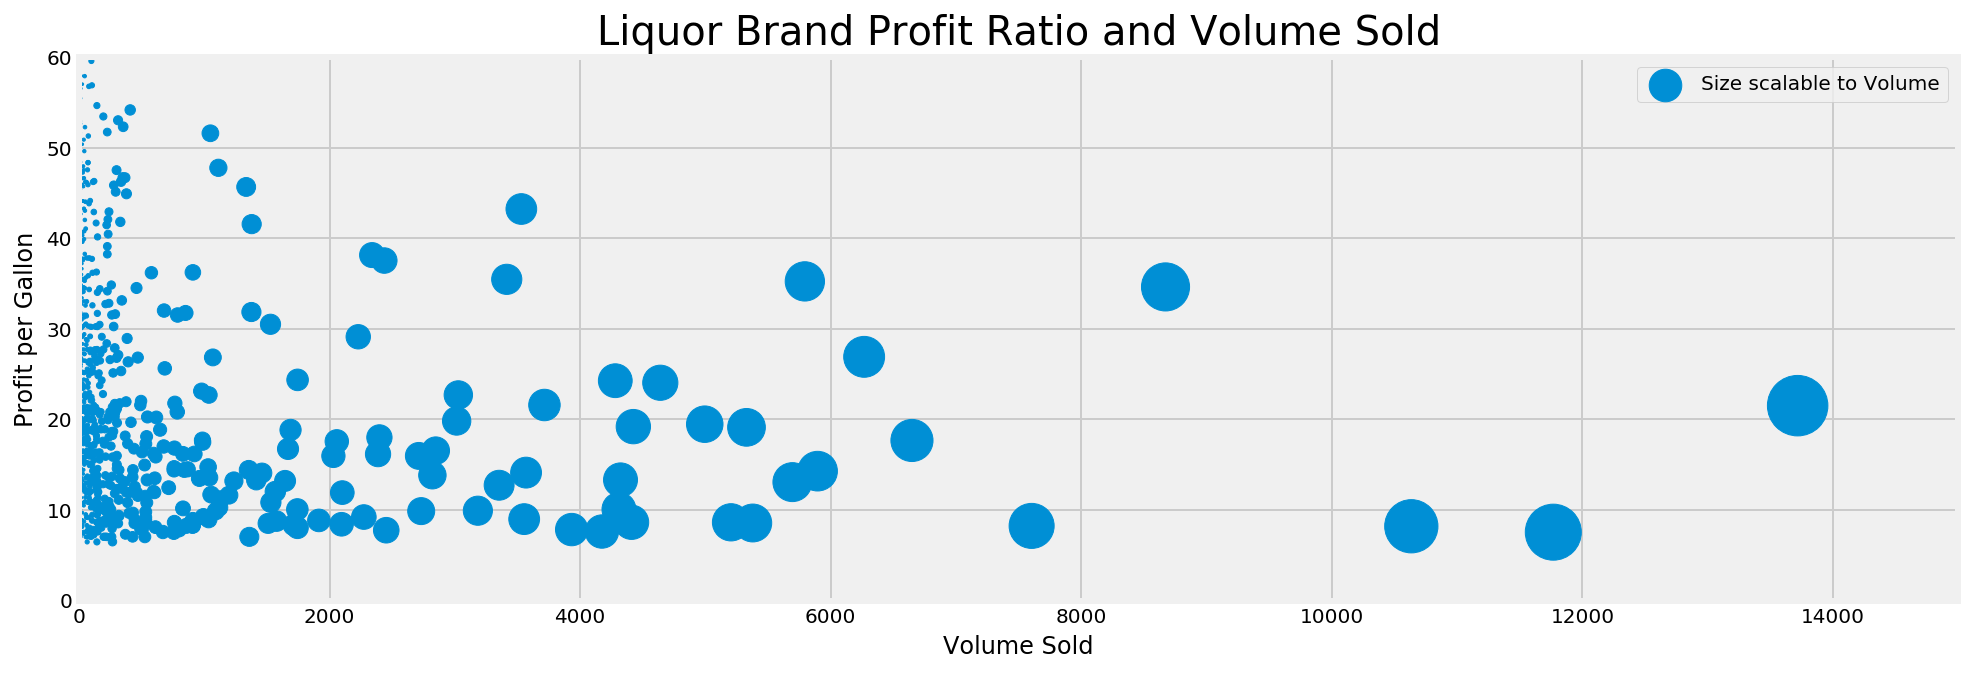

,Liquor,Item Description,Sale (Dollars),Profit,Volume Sold (Gallons),Profit per Gallon
836,Rum,Captain Morgan Spiced Rum,885144.12,295158.62,13718.27,21.515732
1160,Vodka,Barton Vodka,266352.78,88874.90,11767.82,7.552367
1222,Vodka,Five O'clock Vodka,261413.46,87245.73,10634.53,8.204004
1736,Whisky,Jack Daniels Old #7 Black Lbl,900620.59,300262.39,8672.56,34.622117
1321,Vodka,Phillips Vodka,187943.32,62691.01,7603.81,8.244684
784,Rum,Bacardi Superior Rum,350793.27,117504.59,6648.59,17.673610
1153,Vodka,Absolut Swedish Vodka 80 Prf,505605.89,168617.50,6266.97,26.905746
1894,Whisky,Seagrams 7 Crown Bl Whiskey,252680.88,84227.78,5895.25,14.287397
1642,Whisky,Crown Royal Canadian Whisky,612272.80,204122.64,5793.66,35.232071
754,Rum,Admiral Nelson Spiced Rum,223311.79,74465.15,5694.34,13.077047


In [41]:
subplot5_7 = iowa5_7[(iowa5_7['Liquor']!='Misc')].sort_values(by=['Profit per Gallon','Volume Sold (Gallons)'], ascending = False)
plt.figure(figsize=(15, 5))
plt.scatter(subplot5_7['Volume Sold (Gallons)'], subplot5_7['Profit per Gallon'],s=subplot5_7['Volume Sold (Gallons)'].values/15)
plt.xlabel("Volume Sold", fontsize=12)
plt.ylabel("Profit per Gallon", fontsize=12)
plt.title("Liquor Brand Profit Ratio and Volume Sold", fontsize=20)
plt.tick_params(labelsize=10)
plt.axis([0,15000,0,60])
plt.legend(['Size scalable to Volume'],markerscale=0.5)
plt.show()
iowa5_7[(iowa5_7['Liquor']!='Misc')&(iowa5_7['Profit per Gallon'] <60)&(iowa5_7['Volume Sold (Gallons)'] <15000)].sort_values(by=['Volume Sold (Gallons)'], ascending = False).head(20)

In [ ]:
# Are there any noticeable relationships between liquor brand and sales? Profit?
# in general, the profitability is diminishing when the market size(scalability) start to increase.
# however, there are several brand names that stands out of the trend, such as Crown Royal Canadian Whisky
# its size is more than 6ku Gallon in 2015 and the profit/ratio is $35/gallon
# another is Jack Daniels Old #7 Black lbl, volume of more than 9k and the profit/ratio is still $34.7/gallon


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
# based on the previous observation, without explicitly taxing stores based on the size, the tax option would be to
# place a sales surcharge onto the liquor brand names.
# or course, we also do not want to impact small & medium liquor brand, so we will implement a sales tax 
# in volume tier: the more volume sold to the market, the higher the percentage charged to the sales amount.
# In addition, different volume tier rate can be applied to different alcohol categories, policies can be designed 
# in both ways, volume starter and tax rate. It means that spirits can have an earlier volume starting point and 
# a steeper volume tier rate change, compared with beer respectively.
# this tax policies is applicable, in fact, the US government has already been implementing similar excise taxes on
# wine, distilled spirits and beer accordingly
# https://taxnews.ey.com/news/2018-0109-us-tax-reform-included-changes-to-alcohol-excise-taxes
# the tax revenue from these excise tax can always be reused for subsidizing social supporting services 
# such as alcoholic rehabiliation or any health services related to the 
# recovery of excessive alcohol-consumption symptoms.


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?